# Exploratory Data Analysis of House Prices

- Ev Fiyatlari veri seti [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)'dan alinmistir.
- Hedef degisken: Satis Fiyati (SalePrice)

---
## ***Data Cleaning***
- Veri tipleri
- Eksik Degerler

### ***Veri tipleri***

- Veri tiplerini listele

In [58]:
import pandas as pd
import numpy as np
# grafiksel araclar
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
# json dosyasina okuma yazma icin
import json
import math
# aykiri degerleri giderme icin
from scipy.stats.mstats import winsorize
# jb test icin
from scipy.stats import jarque_bera
from scipy.stats import normaltest
# pca icin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}

# veri setini dataframe icerisine yukle
house_prices = pd.read_csv('train.csv')

print('\nHer bir degiskenin tipi:')
print('=======================================')
house_prices.info()


Her bir degiskenin tipi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

- Surekli ve Kategorik degiskenleri belirle.

In [14]:
# object tipinde olmayan sutunlar surekli degiskenler listesine ayir
quantitative = [column for column in house_prices.columns if house_prices.dtypes[column] != 'object']

# id degiskeni ile ilgilenmiyoruz
quantitative.remove('Id')

print('\nSurekli degiskenler : \n', quantitative)

print('\nSurekli degiskenlerin unique deger sayilari  :\n')
for column in quantitative:
    print(column + ' :' , house_prices[column].nunique())

# object tipinde olanlar kategorik degiskenler listesine ayir
qualitative = [column for column in house_prices.columns if house_prices.dtypes[column] == 'object']

print('\nKategorik degiskenler : \n', qualitative)
          
print('\KAtegorik degiskenlerin unique deger sayilari  :\n')
for column in qualitative:
    print(column + ' :', house_prices[column].nunique())


Surekli degiskenler : 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Surekli degiskenlerin unique deger sayilari  :

MSSubClass : 15
LotFrontage : 110
LotArea : 1073
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 327
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4
GarageYrBlt : 97
Gar

- Kategorik degiskenlerden surekli ozelligi gosteren yok (unique deger sayilari beklendigi gibi dusuk)

- Ancak surekli degiskenlerden unique deger sayisi 20 in altinda olanlari listeleyelim.

In [15]:
print('\nSurekli degiskenlerin unique deger sayisi 20 den az olanlar  :\n')
for column in quantitative:
    if house_prices[column].nunique() < 20:
        print(column + ' :' , house_prices[column].unique())


Surekli degiskenlerin unique deger sayisi 20 den az olanlar  :

MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
BsmtFullBath : [1 0 2 3]
BsmtHalfBath : [0 1 2]
FullBath : [2 1 3 0]
HalfBath : [1 0 2]
BedroomAbvGr : [3 4 1 2 0 5 6 8]
KitchenAbvGr : [1 2 3 0]
TotRmsAbvGrd : [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces : [0 1 2 3]
GarageCars : [2 3 1 0 4]
PoolArea : [  0 512 648 576 555 480 519 738]
MoSold : [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold : [2008 2007 2006 2009 2010]


- Unique deger sayisi 20'nin altinda olanlar da surekli ozellikte.

### ***Eksik degerler***
- Eksik degerleri inceleme
    - Eksik degerleri donusturme
    - Eksik degerleri doldurma

#### ***Eksik degerleri inceleme***

In [16]:
print('\nHer bir degiskenin null deger oranlari  (%):')
print('=======================================')

# null degerleri isnull() metodu ile True/False olarak listeleyebilirim
# deger null oldugunda True doneceginden, isnull() metodundan donen nesneye 
# mean() metodunu uyguladigimizda null degerlerin ortlamasini verecektir.
house_prices.isnull().mean()*100


Her bir degiskenin null deger oranlari  (%):


Id               0.000
MSSubClass       0.000
MSZoning         0.000
LotFrontage     17.740
LotArea          0.000
Street           0.000
Alley           93.767
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.548
MasVnrArea       0.548
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinSF1       0.000
BsmtFinType2     2.603
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.068
1stFlrSF   

- Yalnizca bir sutundan NA degere sahip satirlari cikarma (deneme amacli uygulandi)

In [17]:
# house_prices.dropna(subset=['Electrical'])

- Eksik degerlerin doldurmak icin uygun oldugu (eksik deger orani sifirdan buyuk %40 den kucuk) ve olmadigi (yaridan fazla eksik deger bulunan) degiskenler

In [18]:
# sutundaki eksik deger oraninin % 40 dan fazla oldugu sutunlar listesi
many_na_columns = [column for column in house_prices.columns if house_prices[column].isnull().mean() > 0.4]

# sutundaki eksik deger oraninin % 40 dan az oldugu sutunlar listesi
few_na_columns = [column for column in house_prices.columns if (house_prices[column].isnull().mean() < 0.4 and house_prices[column].isnull().mean() != 0)]

print('\nEksik degeri olan ve orani % 40 den az olan  degiskenler \n ', few_na_columns)
print('\nEksik deger orani % 40 den fazla olan degiskenler \n ', many_na_columns)



Eksik degeri olan ve orani % 40 den az olan  degiskenler 
  ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

Eksik deger orani % 40 den fazla olan degiskenler 
  ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


- Eksik degerlerin sutun ve satirlar bazinda gorsellestirilmesinde 4 sutunun neredeyse bos oldugu goruluyor.

In [ ]:
# missingno eksik sutunlari gorsellestirmeye yarar
missingno.matrix(house_prices)
plt.show()

- Eksik degerlerin bar grafigi

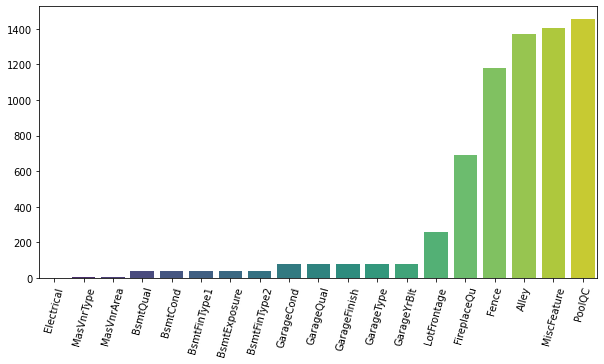

In [20]:
# null degerlerin toplamlarindan olusan seri
missing = house_prices.isnull().sum()

# where eksik degeri sifirdan buyukler icin null doner 
# dropna() ise bu null degerleri atar
missing = missing.where(lambda x : x>0).dropna()
# yukaridaki islemin kisa versiyonu  
# missing = missing[missing > 0]

# degerlere gore sirala
missing.sort_values(inplace=True)

# eksik degerler grafigi
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.xticks(rotation=75)
plt.show()

- Cok fazla eksik deger olan sutunlarda unique degerleri inceleyelim.

In [21]:
for column in many_na_columns:
    print(column + ' :', house_prices[column].unique())

Alley : [nan 'Grvl' 'Pave']
FireplaceQu : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
PoolQC : [nan 'Ex' 'Fa' 'Gd']
Fence : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature : [nan 'Shed' 'Gar2' 'Othr' 'TenC']


- Degiskenler hakkinda aciklama dosyasini parse ettik (bknz. ```parse_data_description_file.ipynb```) ve json dosyasi olarak kaydettik, istenen degiskenler hakkinda aciklamalara artik kolayca erisim saglayabiliriz.

In [22]:
# son olarak test etmek icin json dosyasini okuyup yine bir sozluge yukleyelim
with open('data_description.json', 'r') as f:
    data_description_dict = json.load(f)

# sozlugu (icice sozlukse) duzenli sekilde yazdiran fonksiyon
def prettyprint(d, columns=[], indent=0):
    if columns == []:
        columns = d.keys()
    for key, value in d.items():
        if key in columns:
            print(' ' * indent + str(key), end=': ')
            if isinstance(value, dict):
                prettyprint(value, indent=1)
            else:
                print(' ' * indent + str(value))

prettyprint(data_description_dict, many_na_columns)

Alley:  description:  Type of alley access to property
 Grvl:  Gravel
 Pave:  Paved
 NA :  No alley access
FireplaceQu:  description:  Fireplace quality
 Ex:  Excellent - Exceptional Masonry Fireplace
 Gd:  Good - Masonry Fireplace in main level
 TA:  Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
 Fa:  Fair - Prefabricated Fireplace in basement
 Po:  Poor - Ben Franklin Stove
 NA:  No Fireplace
PoolQC:  description:  Pool quality
 Ex:  Excellent
 Gd:  Good
 TA:  Average/Typical
 Fa:  Fair
 NA:  No Pool
Fence:  description:  Fence quality
 GdPrv:  Good Privacy
 MnPrv:  Minimum Privacy
 GdWo:  Good Wood
 MnWw:  Minimum Wood/Wire
 NA:  No Fence
MiscFeature:  description:  Miscellaneous feature not covered in other categories
 Elev:  Elevator
 Gar2:  2nd Garage (if not described in garage section)
 Othr:  Other
 Shed:  Shed (over 100 SF)
 TenC:  Tennis Court
 NA:  None


- Bu degiskenlerin data description verisini inceledigimizde one-hot ya da integer encoding yapabilecegimiz degiskenler gorulebilir.
- PoolQC ve FireplaceQu degiskenleri, ordinal (siralama) oldugundan integer encoding uygulanabilir.
- Alley, Fence, MiscFeature degiskenleri ise nominal degiskenler oldugundan one hot encoding uygulanabilir.
- Bunlari modelleme asamasinda gerekirse uygulayabiliriz.
- Simdilik buradaki eksik degerleri 'None' degeri ile dolduruyoruz.

- Simdi de eksik degerleri az olan degiskenleri inceleyelim.

In [ ]:
# unique degerleri inceleyelim
for column in few_na_columns:
    print(column + ' :', house_prices[column].unique())

#### ***Eksik degerleri doldurma***

- Yukaridaki kodun ciktisi incelenerek degiskenlerin nasil doldurulabilecegine karar verildi.


- ***sifir degeri ile doldurulabilecek degiskenler***
    - LotFrontage
    - MasVnrArea

In [24]:
for column in ['LotFrontage', 'MasVnrArea']:
    house_prices[column].fillna(0, inplace=True)

- ***'None' string ifadesi ile doldurulacak degiskenler***

In [ ]:
none_columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
           'GarageFinish', 'GarageQual', 'GarageCond' ]
# fazla eksik degerlileri de bu sekilde dolduracagiz onlari da listeye ekledik
none_columns = none_columns + many_na_columns
prettyprint(data_description_dict, none_columns)

In [26]:
for column in none_columns:
    house_prices[column].fillna('None', inplace=True)

- ***o sutunda en cok bulunan deger (mod) ile doldurulacak degiskenler***
    - GarageYrBlt icin en cok bulunan deger 2005
    - Electrical: 'SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan , en cok bulunan deger 'SBrkr'

In [27]:
for column in ['GarageYrBlt','Electrical']:
    # GarageYrBlt ve Electrical en sik gecen mod degeri ile dolduruldu
    house_prices[column].fillna(house_prices[column].mode()[0], inplace=True)

In [ ]:
house_prices.isnull().mean()*100

Eksik degerler dolduruldu sira geldi aykiri degerlere.

---
## ***Outlier Tespiti***

- Gorsellestirme - Boxplotting
- z score
- IQR score (Tukey yontemi)

***Gorsellestirme yontemi***
- Boxplot grafigi ile degiskenler gozlemlenir
    - Burada sureklilik ozelligi gosteren degiskenleri inceledik

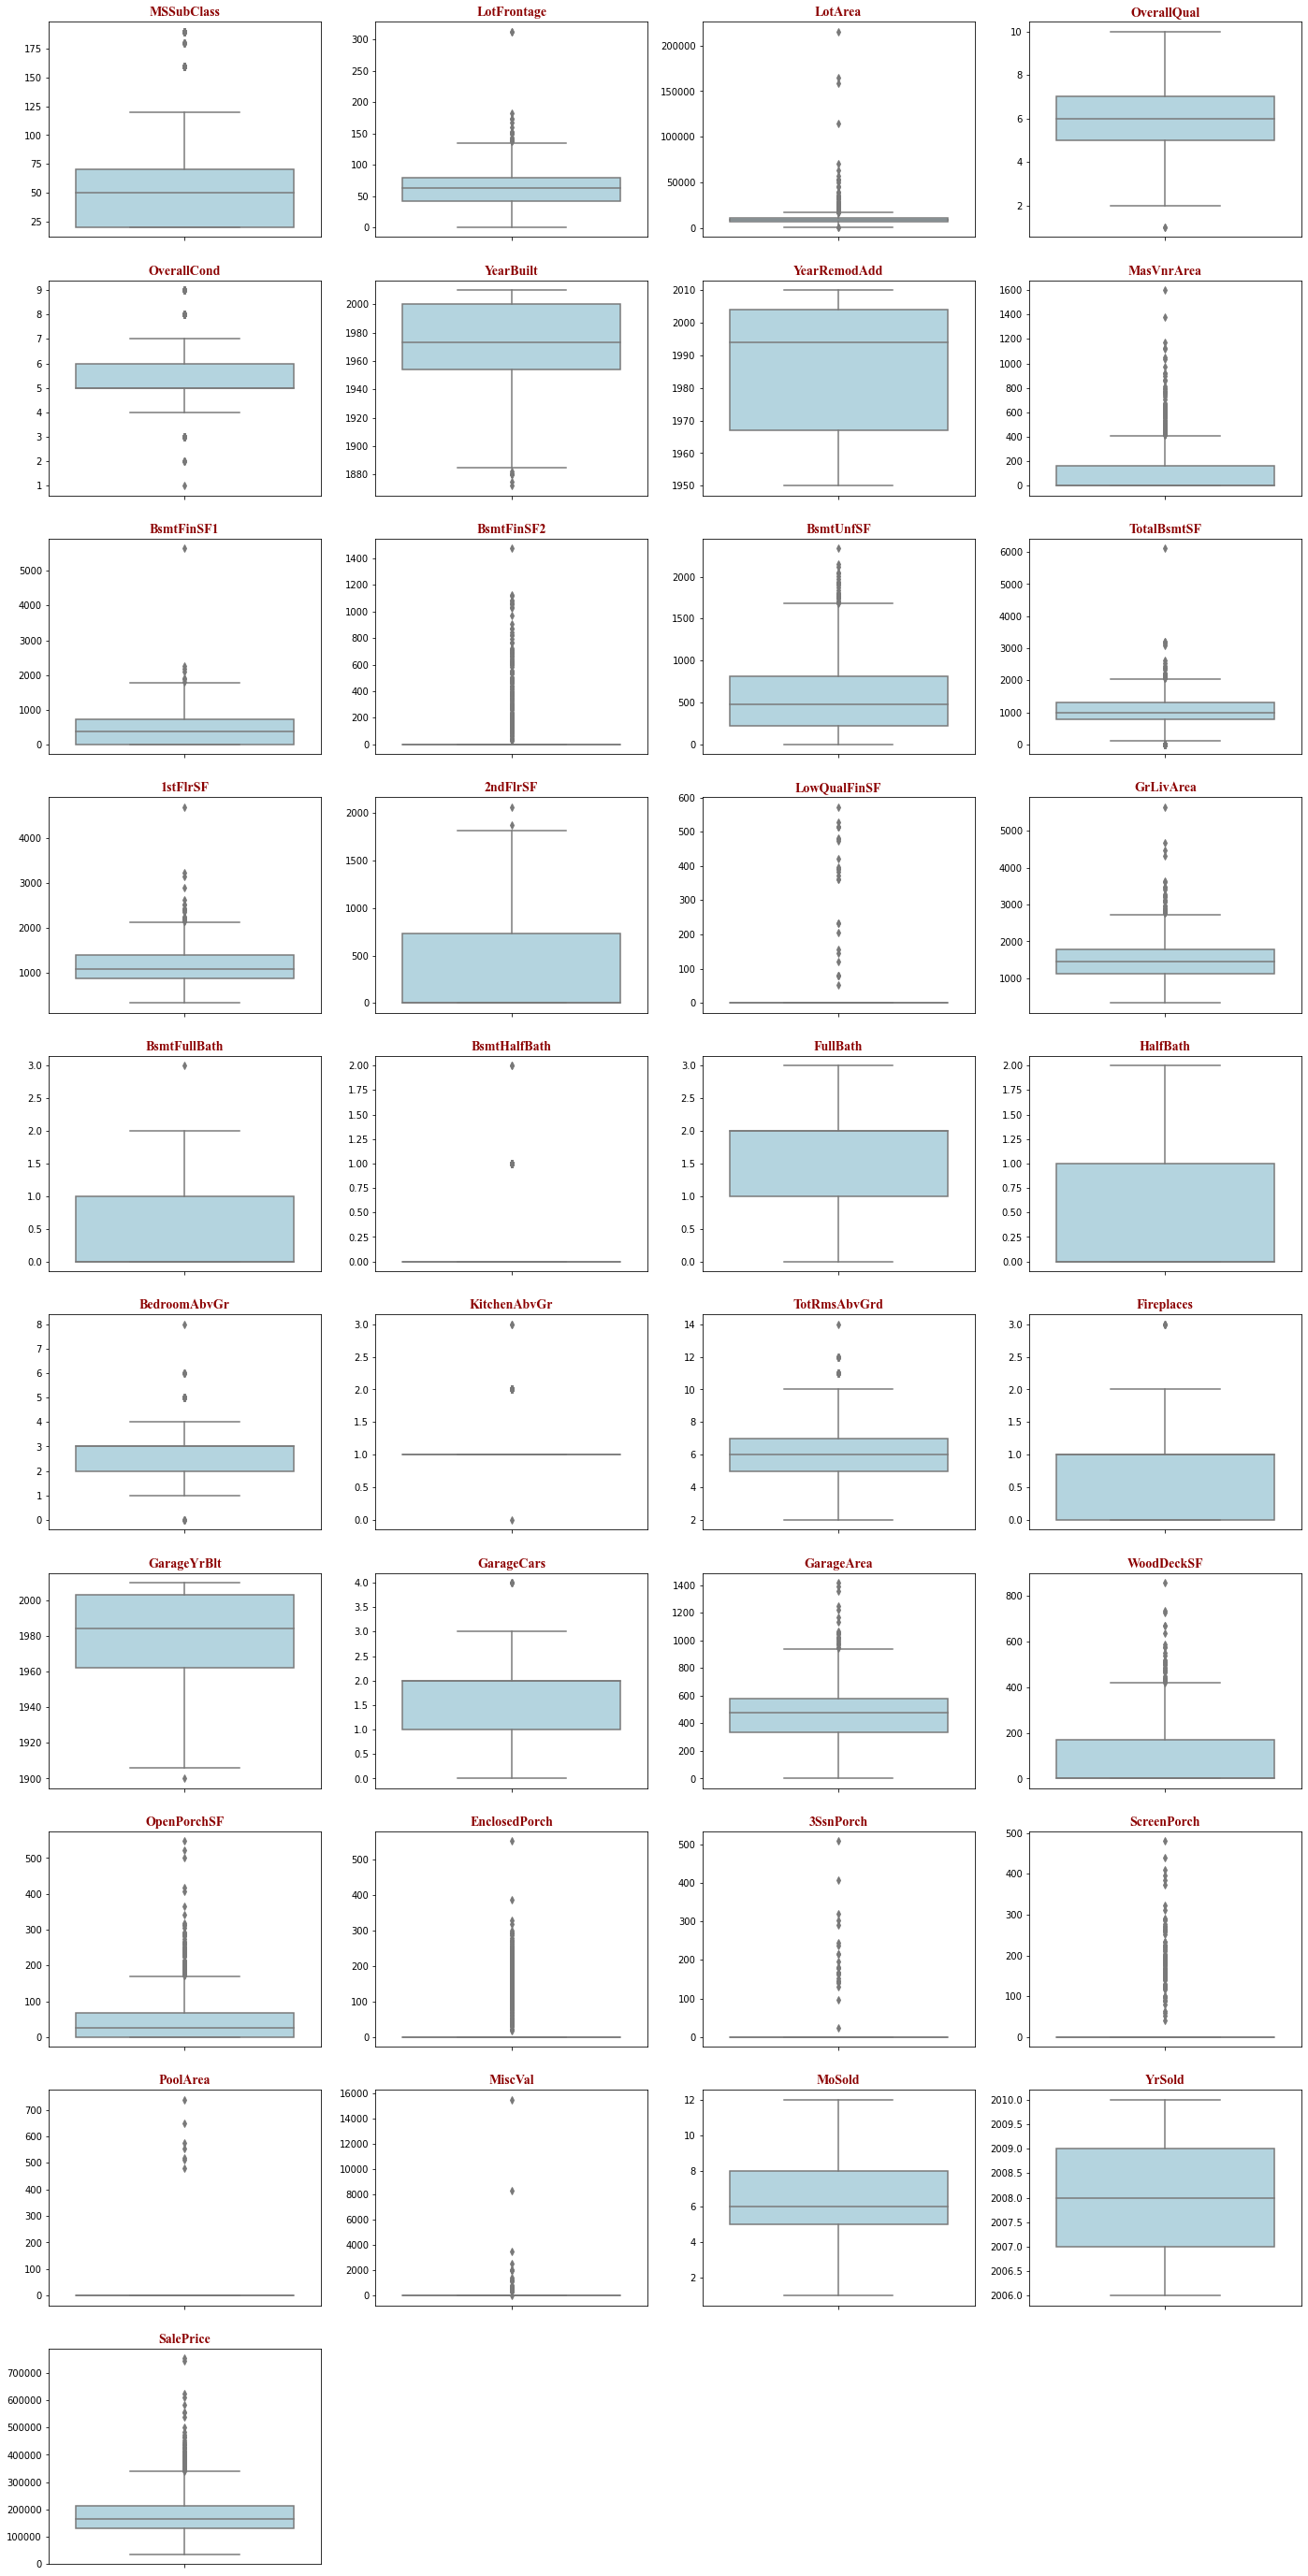

In [29]:
# eksik degerlerin dolduruldugu verileri clean df ine atalim
house_prices_clean = house_prices.copy()

# her satir icin cizilecek grafik
column_n = 4
# satir sayisini hesaplama
row_n = np.ceil(len(quantitative)/column_n)
# satir ve sutun sayisindan grafik boyutu hesabi
plt.figure(figsize=(6 * column_n, 5 * row_n ))


for i, column in enumerate(quantitative):
    plt.subplot(row_n,column_n,i+1)
    ax = sns.boxplot(y=house_prices_clean[column], color='lightblue')
    ax.set(ylabel='')
    plt.title(column, fontdict=title_font)

plt.show()

***Aykiri degerleri giderme***
- Sadece en cok korele olan 5 degisken icin uygulandi.

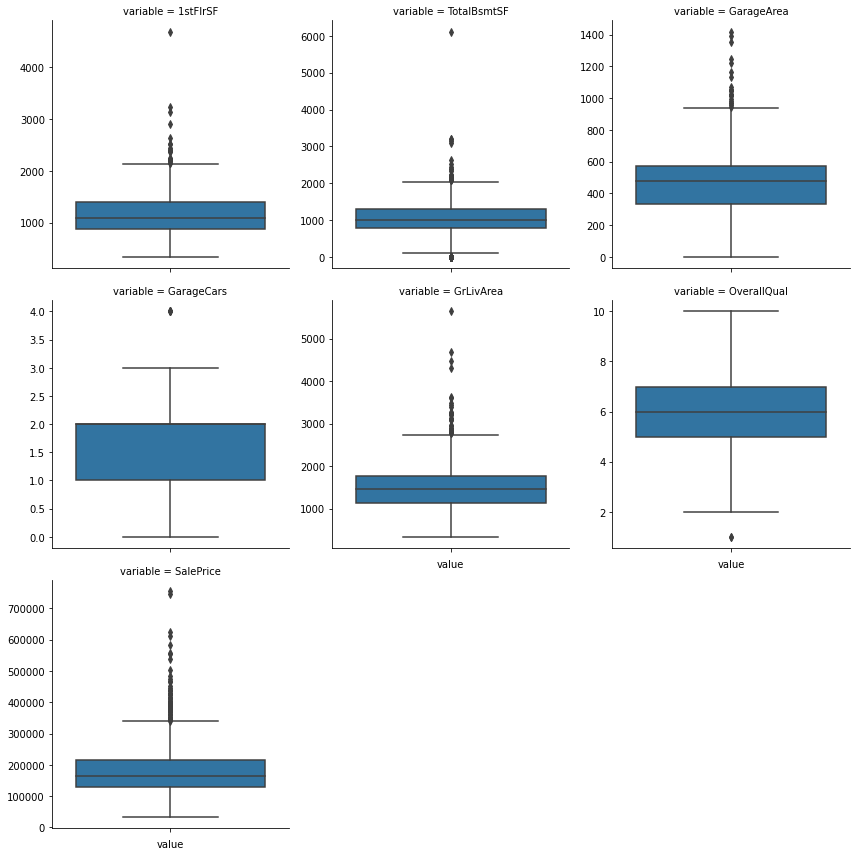

In [67]:
mostly_corr = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 
               'GarageCars', 'GrLivArea', 'OverallQual']
# varsayilan olarak x degeri alan boxplot icin y parametresine deger girildi
def boxplot(y, **kwargs):
    sns.boxplot(y=y)

# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# burada id_vars tanimlanmadigindan df deki id olarak kaldi
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
f = pd.melt(house_prices_clean, value_vars=mostly_corr + ['SalePrice'])

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(boxplot, "value" )

***z score yontemi***

TODO

***Tukey yontemi***

TODO

---
## ***Tek Degiskenli Analiz***

- Veri hakkinda genel bilgiler
- Dagilimlarin incelenmesi

- ***Veri hakkinda genel bilgiler***

In [30]:
print('\nDataframe genel yapisi: \n')
display(house_prices_clean.head())
#print('\nDegiskenerin veri tipleri: \n')
#print(house_prices_clean.info())
print('\nTanimlayici istatistikler (Eksik degerler doldurulduktan sonra) :\n')
display(house_prices_clean.describe())


Dataframe genel yapisi: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,"2,003.000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000



Tanimlayici istatistikler (Eksik degerler doldurulduktan sonra) :



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000"
mean,730.500,56.897,57.623,"10,516.828",6.099,5.575,"1,971.268","1,984.866",103.117,443.640,46.549,567.240,"1,057.429","1,162.627",346.992,5.845,"1,515.464",0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,"1,979.976",1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,"2,007.816","180,921.196"
std,421.610,42.301,34.664,"9,981.265",1.383,1.113,30.203,20.645,180.731,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.750,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,"79,442.503"
min,1.000,20.000,0.000,"1,300.000",1.000,1.000,"1,872.000","1,950.000",0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,"1,900.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,"2,006.000","34,900.000"
25%,365.750,20.000,42.000,"7,553.500",5.000,5.000,"1,954.000","1,967.000",0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,"1,129.500",0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,"1,962.000",1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,"2,007.000","129,975.000"
50%,730.500,50.000,63.000,"9,478.500",6.000,5.000,"1,973.000","1,994.000",0.000,383.500,0.000,477.500,991.500,"1,087.000",0.000,0.000,"1,464.000",0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,"1,984.500",2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,"2,008.000","163,000.000"
75%,"1,095.250",70.000,79.000,"11,601.500",7.000,6.000,"2,000.000","2,004.000",164.250,712.250,0.000,808.000,"1,298.250","1,391.250",728.000,0.000,"1,776.750",1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,"2,003.000",2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,"2,009.000","214,000.000"
max,"1,460.000",190.000,313.000,"215,245.000",10.000,9.000,"2,010.000","2,010.000","1,600.000","5,644.000","1,474.000","2,336.000","6,110.000","4,692.000","2,065.000",572.000,"5,642.000",3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,"2,010.000",4.000,"1,418.000",857.000,547.000,552.000,508.000,480.000,738.000,"15,500.000",12.000,"2,010.000","755,000.000"


- ***Dagilimlarin incelenmesi***

Surekli degiskenler icin dagilimlar incelenir

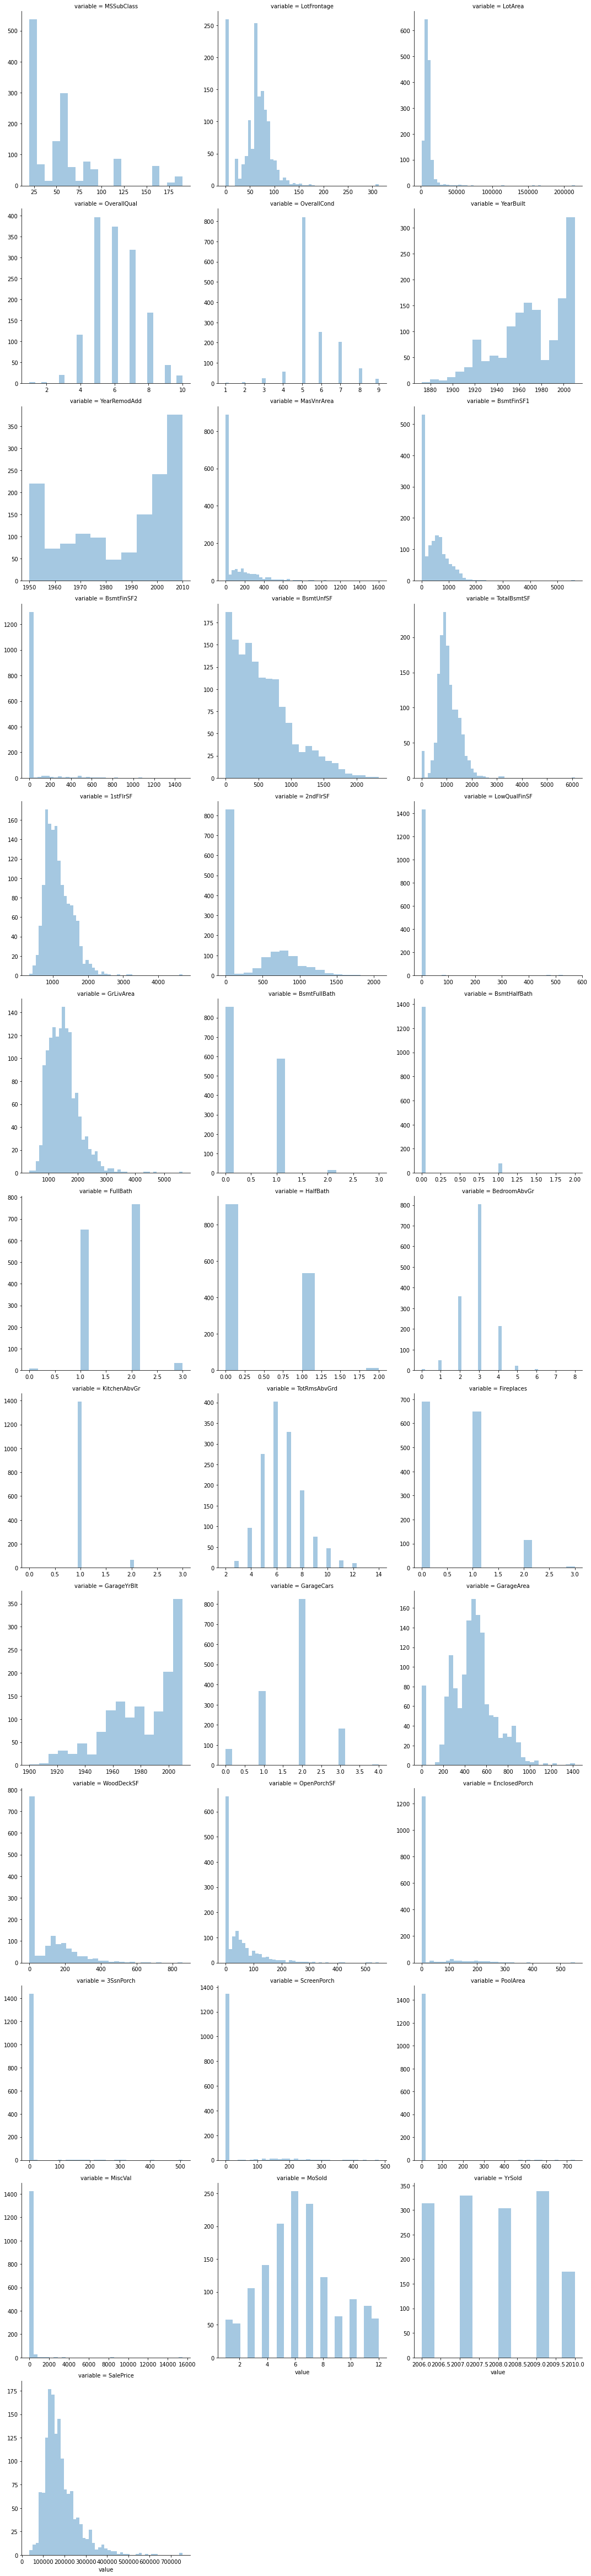

In [31]:
# distplot fonksiyonu tanimlandi
# kde parametresi False olarak tanimlandi
def distplot(x, **kwargs):
    sns.distplot(x, kde=False)

# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# burada id_vars tanimlanmadigindan df deki id olarak kaldi
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
f = pd.melt(house_prices_clean, value_vars=quantitative)

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.distplot, "value", kde=False )


- Dagilim grafikleri incelendiginde log alinarak normalize edilebilecek degiskenler oldugu gorulmektedir.

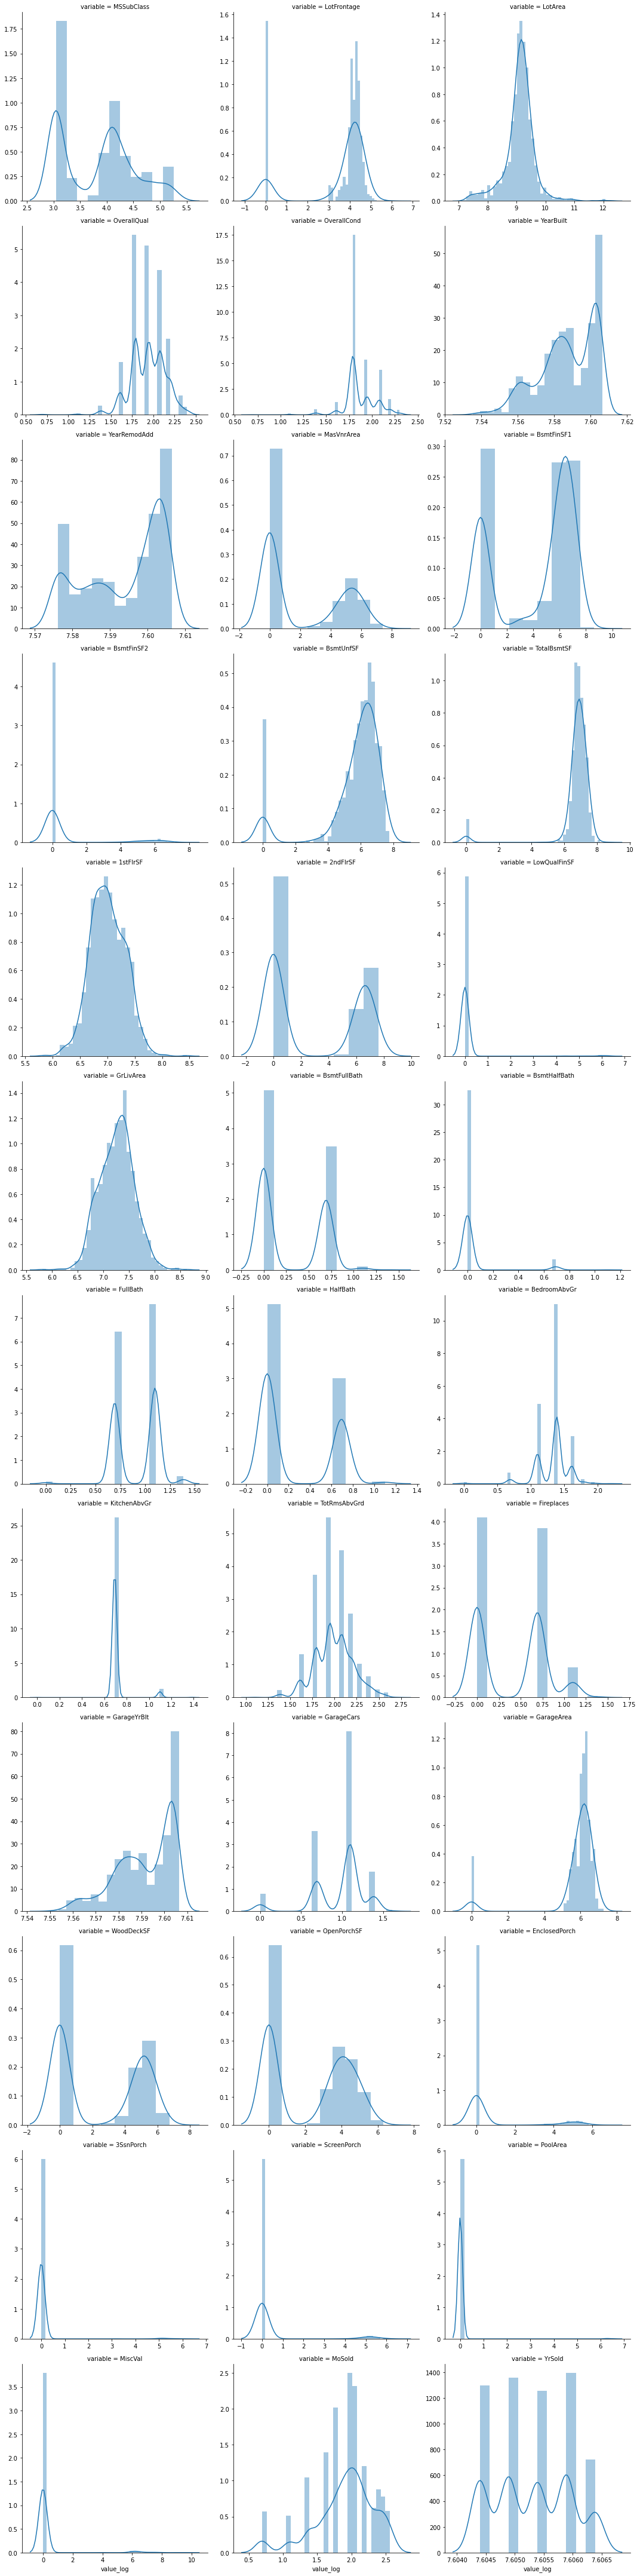

In [153]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# burada id_vars tanimlanmadigindan df deki id olarak kaldi
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
f = pd.melt(house_prices_clean, value_vars=quantitative)

# log alindiginde sonsuz hatasi almamak icin sifir degeri degistirildi
#f.replace(to_replace=0, value=0.1,inplace=True)
# degerlerin log alinarak ayri bir sutun olusturuldu
f['value_log'] = np.log(f['value']+1)

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
# logu alinmis degerler cizdirildi
g = g.map(sns.distplot, "value_log", kde=True )


- LotArea, 1stFLrSF, GrLivArea ve SalePrice log alinarak normale yakin hale girilmis oldu.

***JB Test***

- Dagilimlari normallik testine tabi tutariz.

In [154]:
# to display specified number of digits 
pd.options.display.float_format = '{:.5f}'.format
# Jarque-Bera test fonksiyonu
# ilk parametre dataframe, ikinci parametre test edilen df sutunlari 
def jbtest(df, columns):
    distribution_tests = pd.DataFrame(columns=['feature', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                             'normal_stats', 'normal_p_value'])
    for column in columns:
        jb_stats = jarque_bera(df[column])
        norm_stats = normaltest(df[column])
        distribution_tests = distribution_tests.append({"feature": column,
                                                    "jarque_bera_stats" : jb_stats[0] ,
                                                    "jarque_bera_p_value" : jb_stats[1] ,
                                                    "normal_stats": norm_stats[0] , 
                                                    "normal_p_value" : norm_stats[1]
                                                   }, ignore_index=True)
    display(distribution_tests)
    
    
jb_columns = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

jbtest(house_prices_clean, jb_columns)

,feature,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,LotArea,2531814.83183,0.00000,2590.59187,0.00000
1,1stFlrSF,2452.09517,0.00000,461.00674,0.00000
2,GrLivArea,1898.79508,0.00000,437.12026,0.00000
3,SalePrice,3438.87212,0.00000,610.83591,0.00000


- Testi gecemediler.

---
## ***Cok degiskenli analiz***

***Surekli-Kategorik degisken analizi***
- Hedef degiskenimiz satis fiyati (sale price)
- Hedef degiskenle (surekli), kategorik degiskenlerimizi bar grafigi ile analiz edebiliriz.

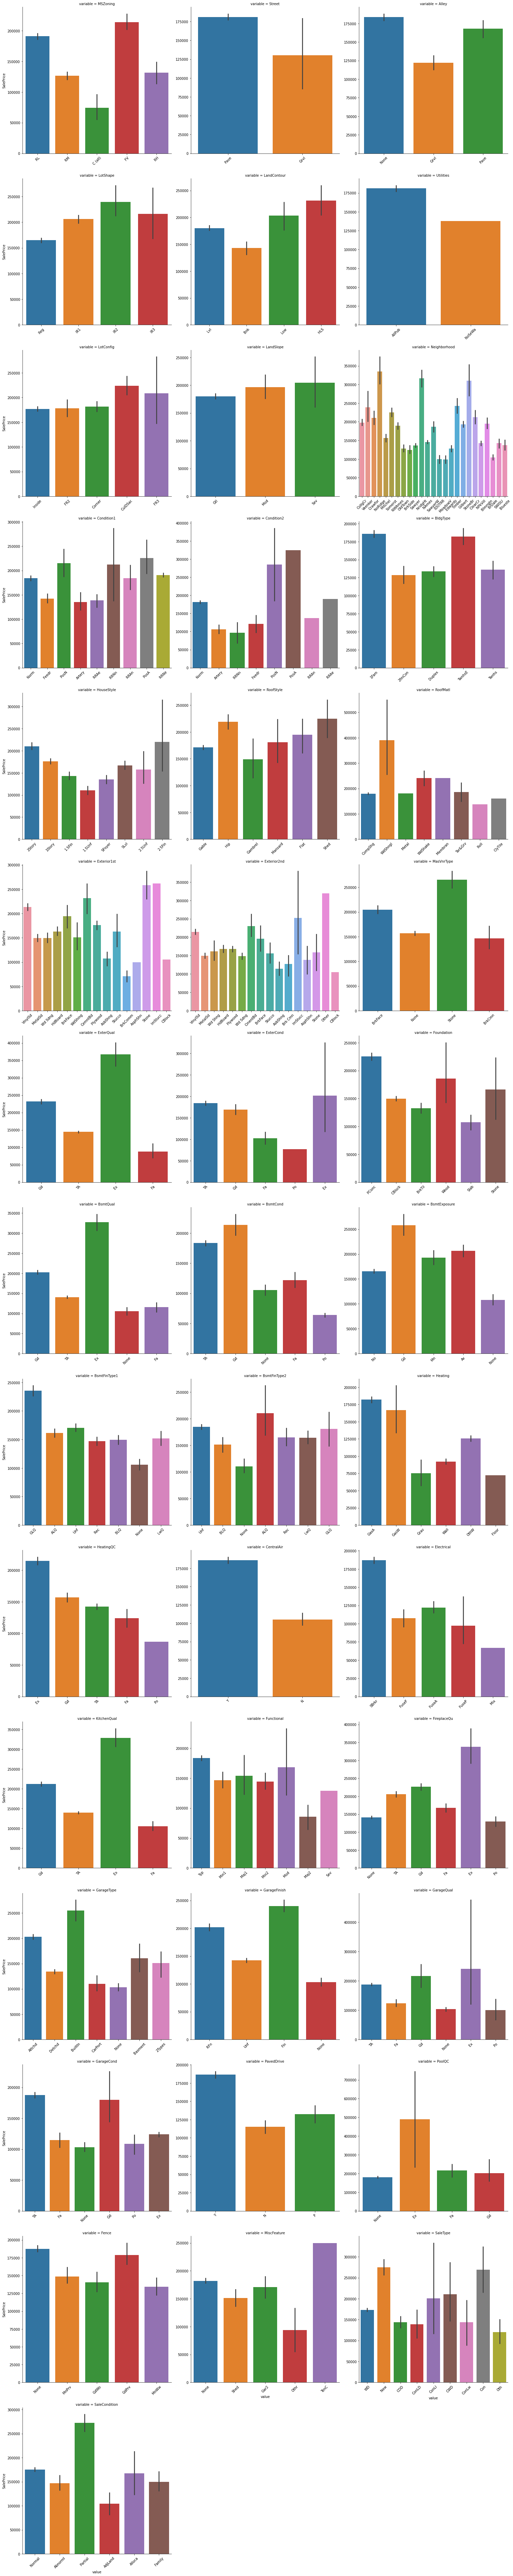

In [33]:
# barplot fonksiyonu tanimlandi
# fonksiyon icnide xticks rotasyon uygulandi 
def barplot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=45)

# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice'], value_vars=qualitative)
f
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=7)
g = g.map(barplot, "value", "SalePrice")

***T testi***
- t-testi, kategorik degiskenlerdeki deger farklılıklarınin istatistiksel olarak anlamlı olup olmadığını tespit etmemize yarar.

TODO

***Korelasyon***

- Surekli degiskenlerin korelasyonu incelenir.

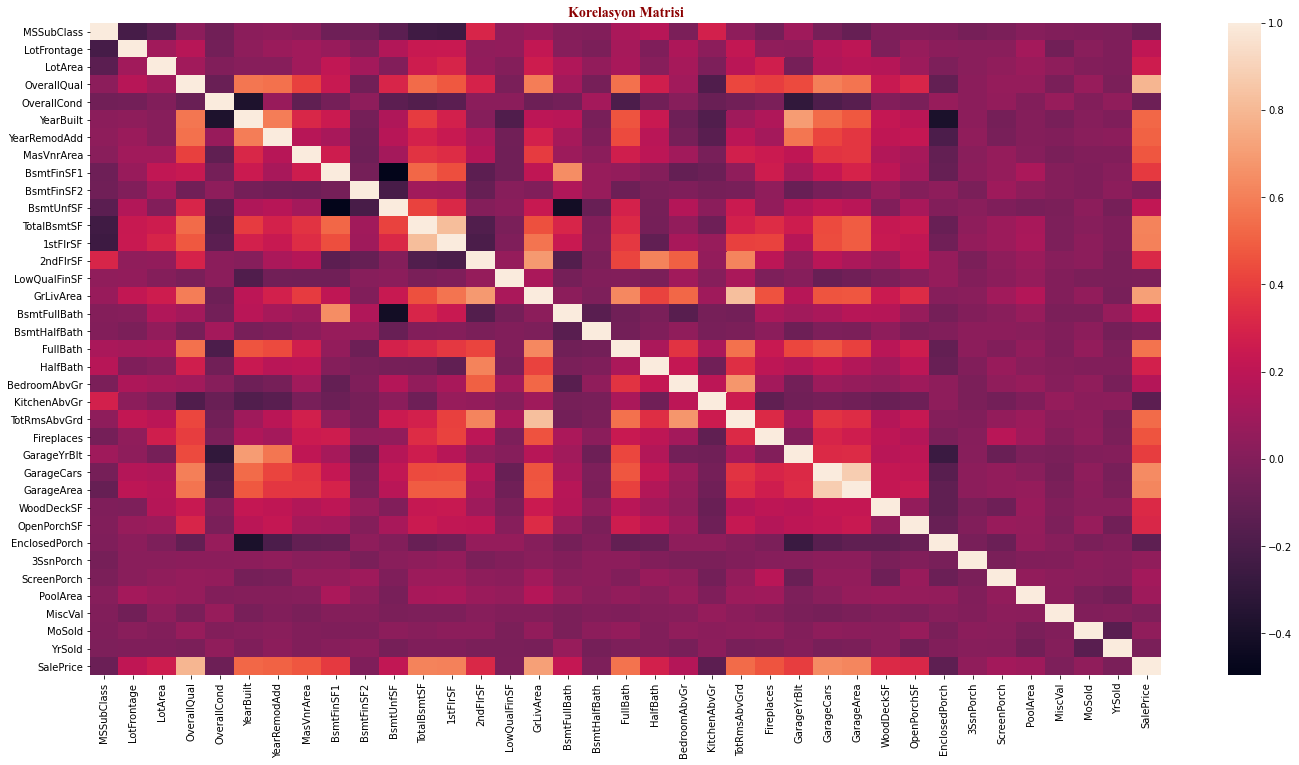

In [34]:
# matriste id degiskenini dikkate almamasi icin 
# sadece surekli degiskenlerin oldugu veriler korele edildi
corr_matrix = house_prices_clean[quantitative].corr()

plt.figure(figsize=(24,12))
sns.heatmap(corr_matrix)
plt.title("Korelasyon Matrisi", fontdict=title_font)

plt.show()

- Hedef degiskene gore korelasyon degerleri siralanir ve grafigi incelenir.

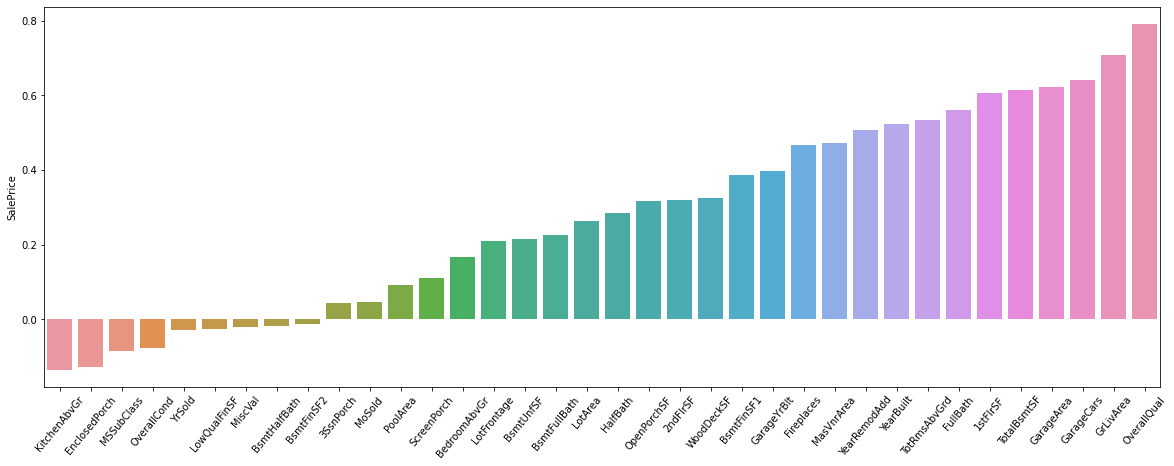

In [35]:
#corr_matrix
# sadece hedef degiskenin oldugu bolumu matristen aldik
sale_price_corr = corr_matrix['SalePrice'].sort_values()
# hedef degiskenimizi (SalePrice) cikardik
sale_price_corr.drop('SalePrice', inplace= True)

plt.figure(figsize=(20,7))
#plt.bar(x=sale_price_corr.index, height=sale_price_corr)
sns.barplot(x=sale_price_corr.index, y=sale_price_corr)
plt.xticks(rotation=50)
plt.show()

- En yuksek korelasyona sahip degiskenler negatif degerler de dikkate alinarak cikarilir.

In [164]:
# negatif korelasyon da onemli ama burda yuksek negatif korelasyon yok
sale_price_corr = np.abs(sale_price_corr).sort_values()

#En cok korele olan 6 degiskeni aldik
mostly_corr = sale_price_corr[-6:].index
mostly_corr

Index(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual'],
      dtype='object')

- En cok korele olan degiskenlerin hedef degisken ile iliskisi scatterplot ile incelenir.

In [ ]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice'], value_vars=mostly_corr)

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=8)
g = g.map(sns.scatterplot, "value", "SalePrice")

- Kategorik degiskenler hue parametresiyle 3 uncu boyut olarak katilarak scatter plot ile etkisi incelenir. Ayrica grid nesnesine legend eklenir. SaleCondition degiskeni eklendi.

In [173]:
data_description_dict['SaleCondition']

{'description': 'Condition of sale',
 'Normal': 'Normal Sale',
 'Abnorml': 'Abnormal Sale -  trade, foreclosure, short sale',
 'AdjLand': 'Adjoining Land Purchase',
 'Alloca': 'Allocation - two linked properties with separate deeds, typically condo with a garage unit',
 'Family': 'Sale between family members',
 'Partial': 'Home was not completed when last assessed (associated with New Homes)'}

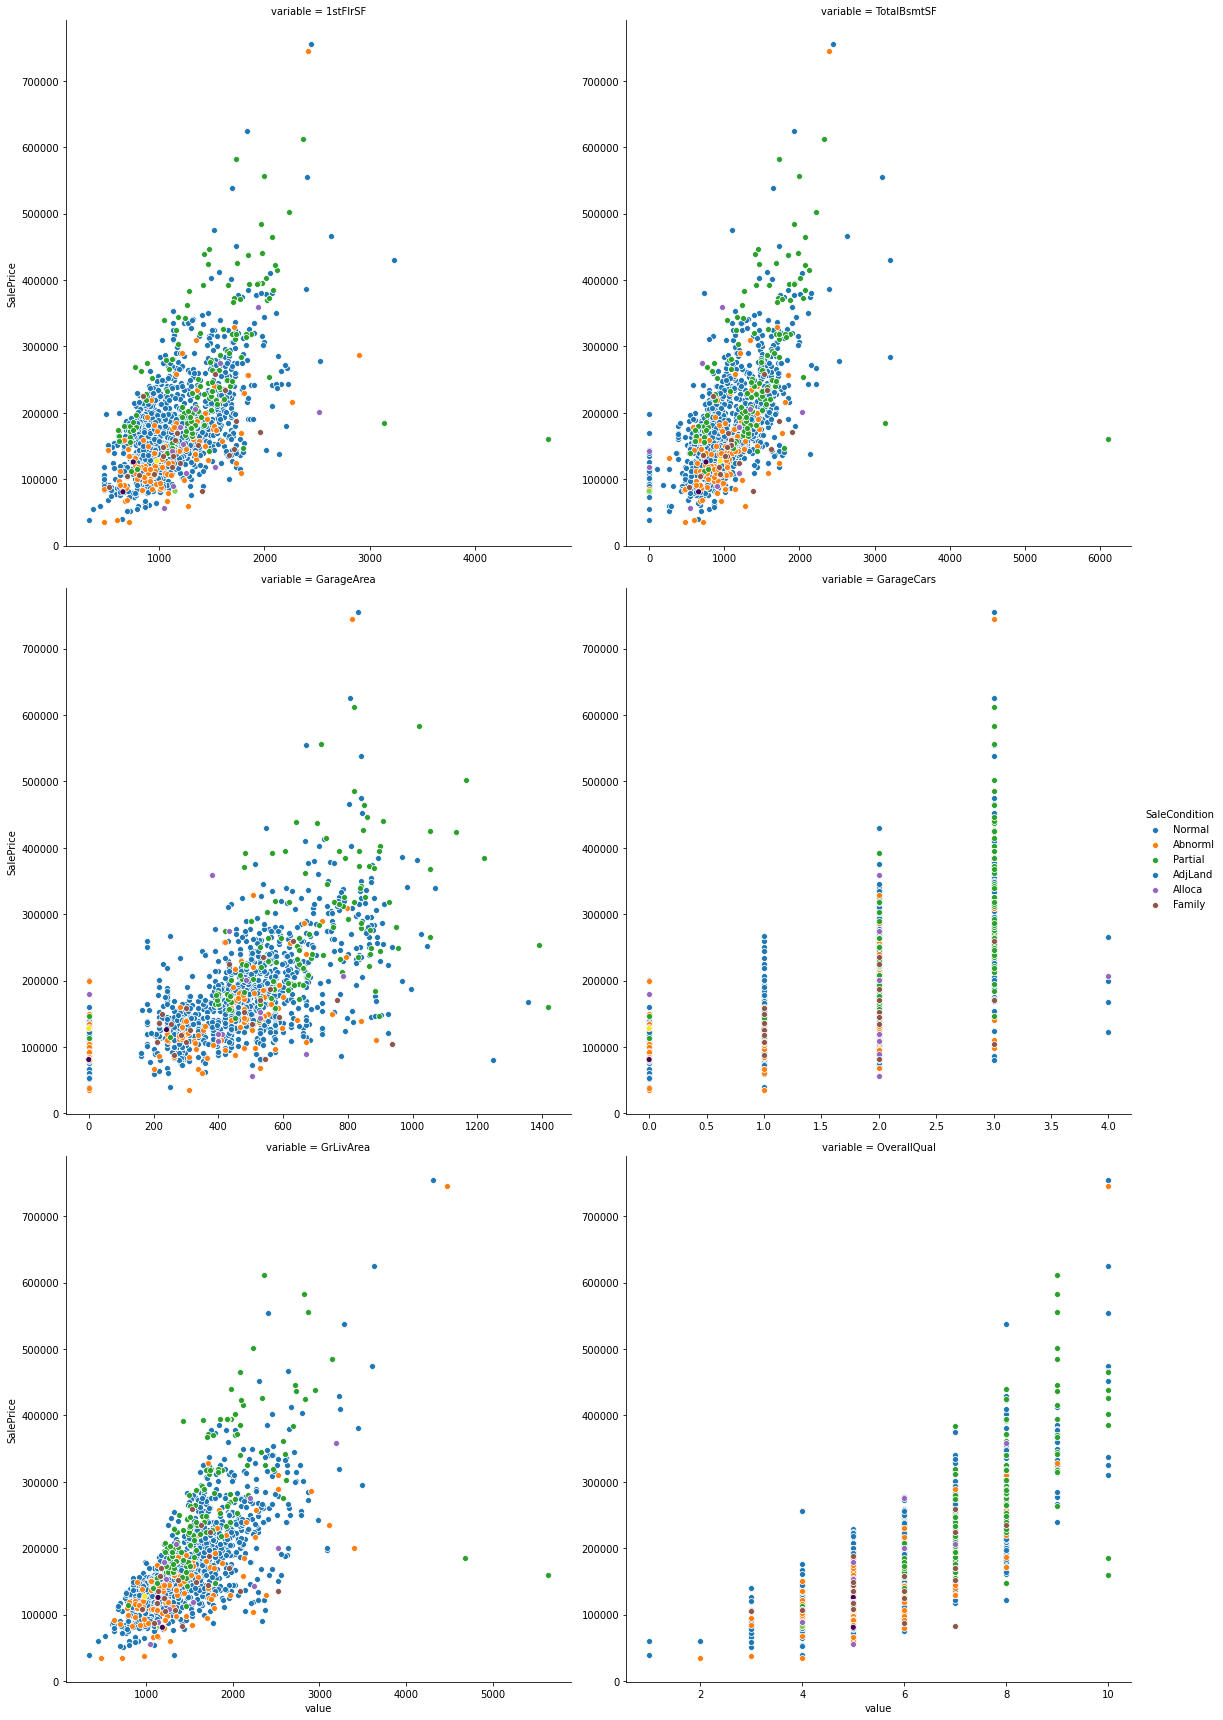

In [175]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice','SaleCondition'], value_vars=mostly_corr)

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,
                  hue= 'SaleCondition', size=8)
g = g.map(sns.scatterplot, "value", "SalePrice")
g = g.add_legend()

- ```GarageCars``` ve ```OverAllQual```  degiskenlerinde noktalar ust uste bindiginden bu degiskenleri swarmplot ile incelemek daha mantikli olacaktir.

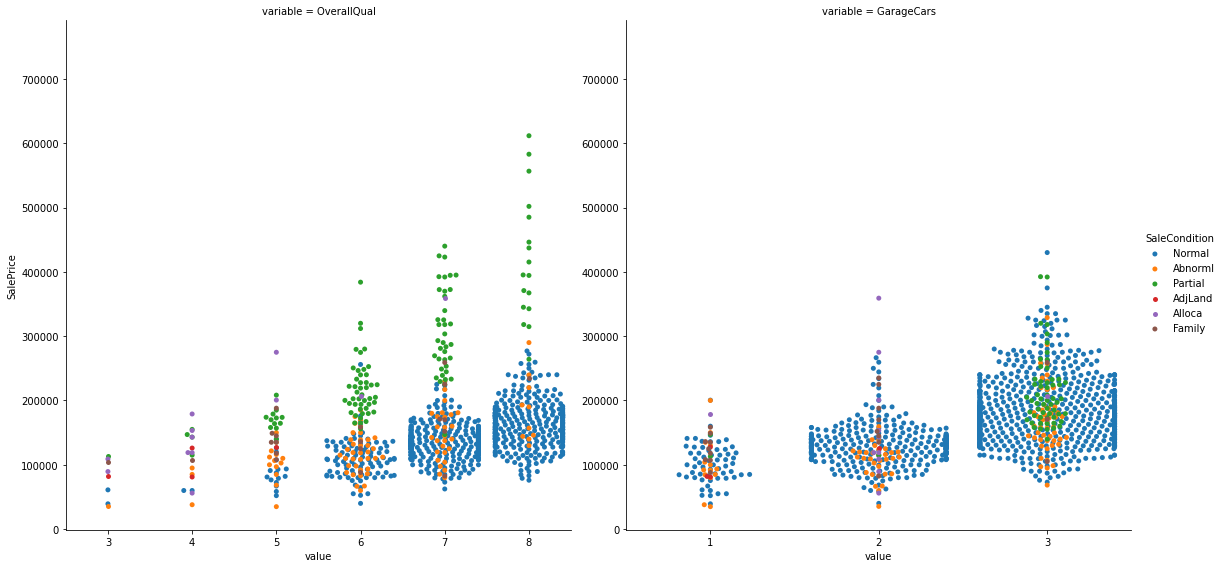

In [176]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice', 'SaleCondition'], 
            value_vars=['OverallQual', 'GarageCars'])

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, 
                  hue='SaleCondition', size=8)
g = g.map(sns.swarmplot, "value", "SalePrice")
g = g.add_legend()

- En cok korele olanlarin ve hedef degiskenin logu alinarak iliskileri incelenedi

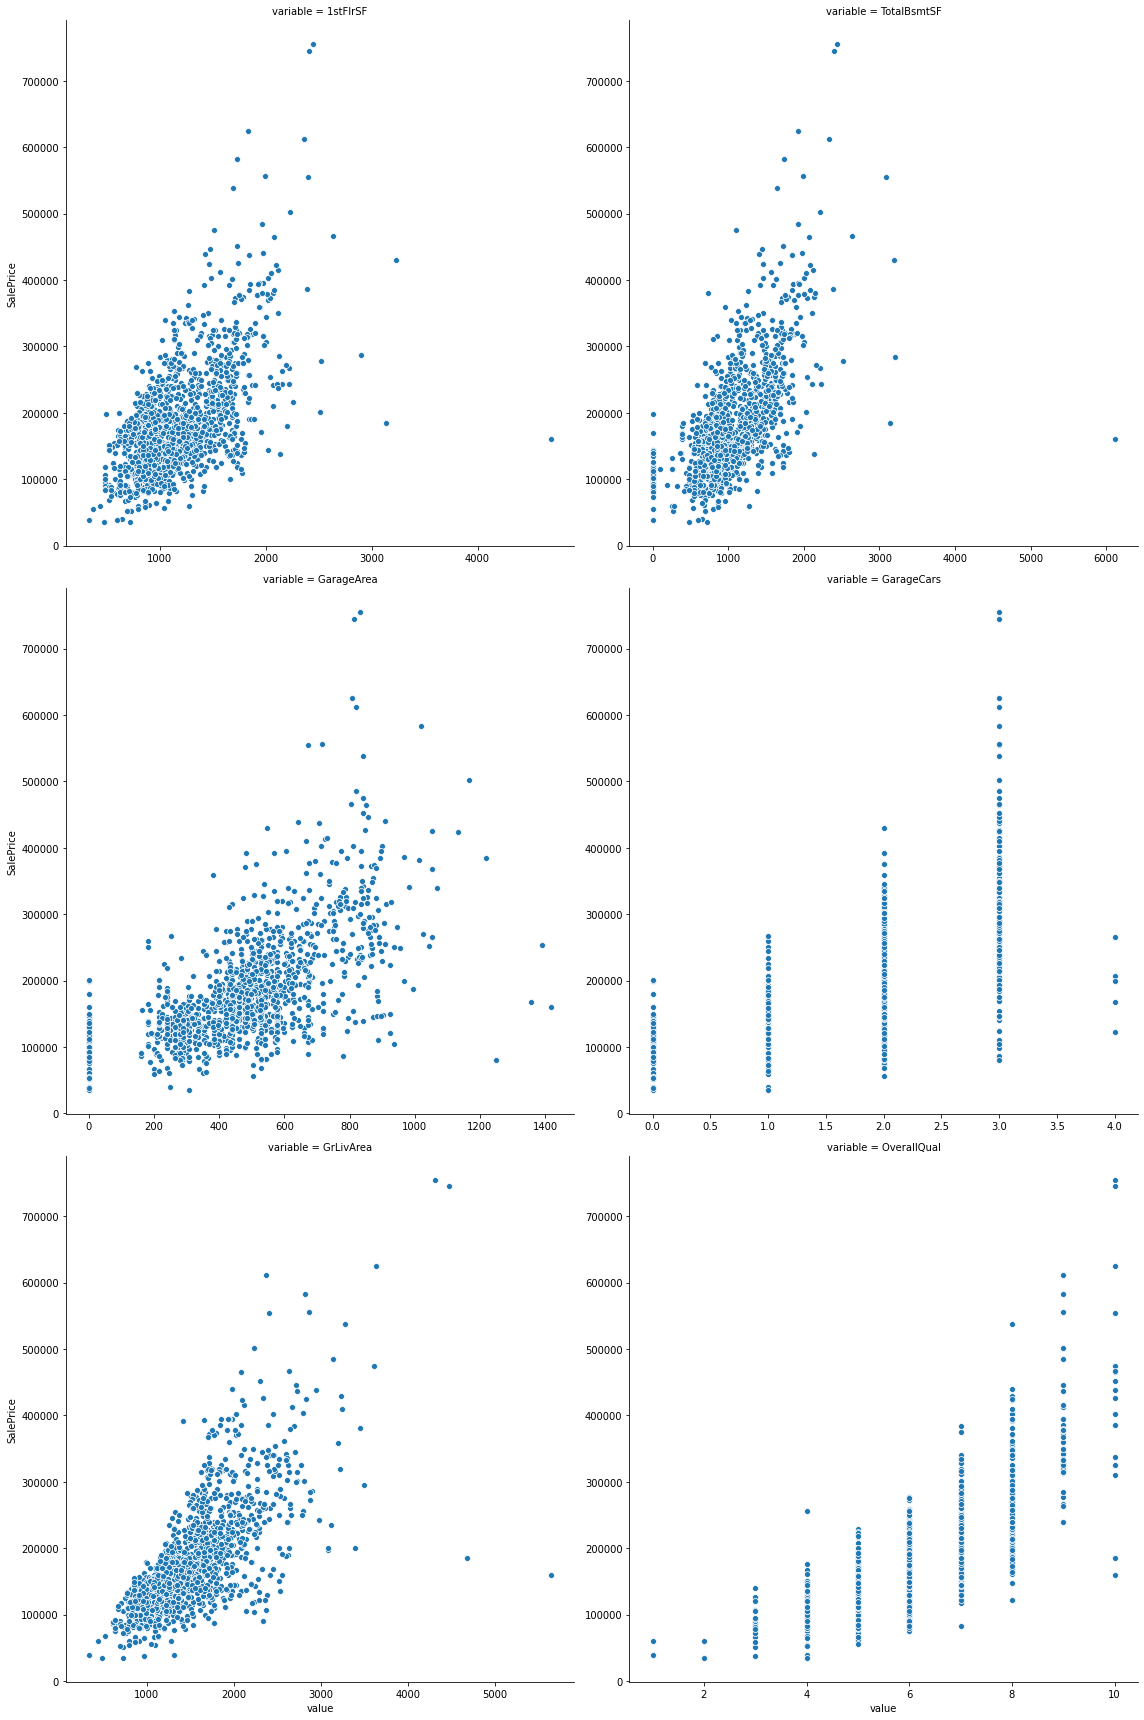

In [161]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice'], value_vars=mostly_corr)

# log alindiginde sonuz hatasi almamak icin sifir degeri degistirildi
#f.replace(to_replace=0, value=0.1,inplace=True)
# degerlerin log alinarak ayri bir sutun olusturuldu
# log alindiginde sonuz hatasi almamak icin +1 eklendi
f['value_log'] = np.log(f['value']+1)
# SalePrice ayri sutunda oldugundan onu da logu alindi
f['SalePrice_log'] = np.log(f['SalePrice'])

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=8)
g = g.map(sns.scatterplot, "value", "SalePrice")

---
## ***Ozellik Muhendisligi***


***Temel Bilesenler Analizi (Principal Components Analysis - PCA)***

- Temel bilesen(ler)i belirleme
- Temel bilesen(ler)in hedef degiskenle korelasyonunu inceleme

***Temel bilesenleri belirleme***

In [39]:
# hedef degiskeni surekli degiskenlerden cikardik
quantitative.remove('SalePrice')

- Ozvektorler ve ozdegerler belirlenir.

In [99]:
### covariance matrix
# dataframe den gerekli sutunlar alinir (surekli degerler)
house_prices_pca = house_prices_clean[quantitative]

# veriler X matrisine aktarilir
X = StandardScaler().fit_transform(house_prices_pca)

# X in transpozu alinir
Xt = X.T

# covariance matrisi hesaplanir
Cx = np.cov(Xt)
#print('Kovaryans matrisi :\n', Cx)

### eigenvectors and eigenvalues
# covariance matrisinden ozvektorler ve ozdegerler hesaplanir
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

- Scree grafigi cizilir.

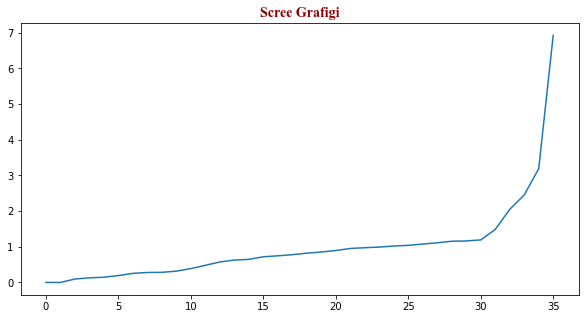

Ozdegerler Matrisi:
[-5.34425325e-17  5.64373198e-16  9.52601789e-02  1.29667111e-01
  1.46668151e-01  1.93755067e-01  2.54615322e-01  2.78930270e-01
  2.83851696e-01  3.17015381e-01  3.88612034e-01  4.80226143e-01
  5.74555104e-01  6.27856175e-01  6.47687427e-01  7.19766923e-01
  7.46645020e-01  7.78436351e-01  8.21249794e-01  8.53571501e-01
  8.95370365e-01  9.52359894e-01  9.74817547e-01  9.91411915e-01
  1.02142696e+00  1.04048970e+00  1.07631172e+00  1.11285666e+00
  1.15557721e+00  1.16371277e+00  1.19208155e+00  1.48604938e+00
  2.05040118e+00  2.45300049e+00  3.19104674e+00  6.92939069e+00]


In [85]:
plt.figure(figsize=(10,5))
plt.title('Scree Grafigi', fontdict=title_font)
plt.plot(np.sort(eig_val_cov))

plt.show()
print('Ozdegerler Matrisi:')
print(np.sort(eig_val_cov))

- Kayşat grafiği ve özdeğerler > 1 kuralı, ilk 5 bileşeni tutmamız gerektiği konusunda hemfikirdir. 
- Yeni bileşenlerimizin eski değişkenlerimizle ne kadar iyi korelasyon gösterdiğine bakalim.
    - Oncelikle temel bilesen olusturulmali bunu scikit-learn'deki PCA fonksiyonunu kullanarak yapabiliriz.

Veri kümesindeki toplam varyans yüzdesi:
 [0.19235124 0.08857947 0.06809223 0.05691658 0.04125088 0.0330907
 0.03230321 0.03207738 0.03089151 0.02987707 0.0288827  0.02835354
 0.02752036 0.02705972 0.02643632 0.02485436 0.02369408 0.02279687
 0.02160842 0.02072593 0.01997983 0.01797899 0.0174285  0.01594893
 0.01333048 0.01078739 0.00879995 0.00787937 0.00774276 0.0070678
 0.0053784  0.00407132]


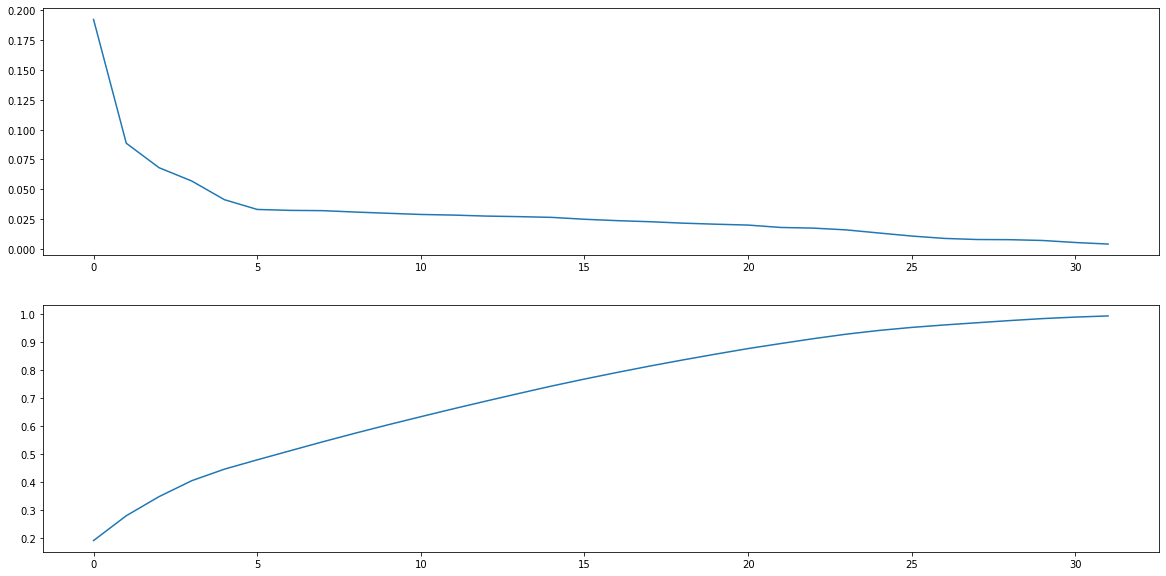

In [110]:
# sklearn yontemi
# kac bilesen seciyorsak PCA metoduna parametre olarak giriyoruz
sklearn_pca = PCA(n_components=0.99)
Y_sklearn = sklearn_pca.fit_transform(X)
print('Veri kümesindeki toplam varyans yüzdesi:\n',sklearn_pca.explained_variance_ratio_)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(sklearn_pca.explained_variance_ratio_)
plt.subplot(212)
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_))
plt.show()

- Dizinin elemanlarini toplarsak 

In [90]:
sklearn_pca.explained_variance_ratio_.sum()

0.9937562991652369

- Temel Bileşenler Analizi (PCA) uygulandiktan sonra toplam varyansın %44'u ilk 5 bileşen tarafından açıklanabilmektedir.

***Temel bilesenlerin hedef degiskenle korelasyonu***

- Oncelikle temel bilesenimizi dataframe e ekleriz
- Daha sonra korelasyon grafigini inceleriz

In [44]:
# degiskenlere erisim testi, matristen 0,1,2,3,4 uncu sutunlar tek tek alinacak
Y_sklearn[:,0]

array([ 1.5060995 , -0.07166844,  1.68184614, ...,  0.61758919,
       -2.81620364, -0.87420586])

In [51]:
# 5 sutun dataframe e eklenir, PC0...PC4
for i in range(5):
    house_prices_clean['PC'+str(i)] = Y_sklearn[:,i]

# korelasyon sutunlari belirlenir
corr_columns = ['PC' + str(i) for i in range(5)]
corr_columns.append('SalePrice')

# korele edilecek veriler
house_prices_clean[corr_columns]

,PC0,PC1,PC2,PC3,PC4,SalePrice
0,1.50610,0.37600,-1.55560,-1.87602,0.70809,208500
1,-0.07167,-1.07655,1.28854,0.06687,-1.66413,181500
2,1.68185,0.25946,-1.33287,-1.33517,-0.03292,223500
3,-0.33425,1.07680,1.03317,0.00735,0.26172,140000
4,4.41191,1.07571,-0.38457,-1.32939,0.01389,250000
...,...,...,...,...,...,...
1455,0.88952,1.39215,-1.91451,0.45438,-0.51315,175000
1456,2.30137,-1.78176,2.31076,0.27345,0.36393,210000
1457,0.61759,3.25613,1.86321,-0.06807,-1.42176,266500
1458,-2.81620,-1.96538,2.04485,-0.89814,-0.51077,142125


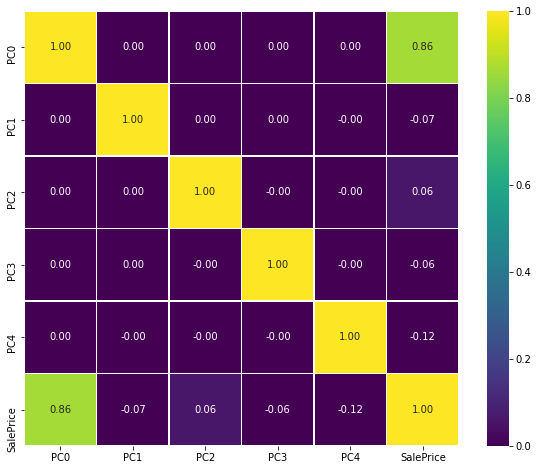

In [108]:
# korelasyon hesaplama
pca_corr = house_prices_clean[corr_columns].corr()


# korelasyon grafigi cizilir
plt.figure(figsize=(10,8))
sns.heatmap(pca_corr,  square=True, annot=True,fmt='.2f', linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.show()

- ```PC0``` degiskeninin ```SalePrice``` ile korelasyonu $0.86$ cikti, ama diger degiskenlerle korelasyonu cok dusuk.
- Buradaki korelasyon bize cok bisey ifade etmez.